# Телекоммуникации

Оператор связи хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

**Оператор предоставляет два основных типа услуг:**
<br>        * Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
<br>        * Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

**<br>Также доступны такие услуги:**
<br>        * Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
<br>        * Выделенная линия технической поддержки (TechSupport);
<br>        * Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
<br>        * Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

<br>За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**Подробнее про данные:**
<br>BeginDate - дата начала пользования услугами;
<br>EndDate - дата окончания пользования услугами;
<br>Type - тип оплаты: ежемесячный, годовой и т.д.;
<br>PaperlessBilling - электронный платежный документ;
<br>PaymentMethod - способ оплаты;
<br>MonthlyCharges - ежемесячные траты на услуги по договору;
<br>TotalCharges - всего потрачено денег;
<br>Dependents - началичие иждивенцев;
<br>SeniorCitizen - началие пенсионного статуса по возрасту;
<br>Partner - наличие супруга(и);
<br>MultipleLines - наличие возможности ведения параллельных линий во время звонка.

In [ ]:
%pip install fast-ml
%pip install phik
%pip install scikit-learn==1.1.3

import pandas as pd
from pandas.api.types import is_string_dtype

from fast_ml import eda

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import phik

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from catboost import CatBoostClassifier

In [4]:
RANDOM_STATE = 310723

In [5]:
try:
    contract_new = pd.read_csv('contract_new.csv')
    personal_new = pd.read_csv('personal_new.csv')
    internet_new = pd.read_csv('internet_new.csv')
    phone_new = pd.read_csv('phone_new.csv')

except:
    contract_new = pd.read_csv('/datasets/contract_new.csv')
    personal_new = pd.read_csv('/datasets/personal_new.csv')
    internet_new = pd.read_csv('/datasets/internet_new.csv')
    phone_new = pd.read_csv('/datasets/phone_new.csv')

In [6]:
eda.df_info(contract_new)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
customerID,object,Categorical,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",0,0.0
BeginDate,object,Categorical,77,"[2020-01-01, 2017-04-01, 2019-10-01, 2016-05-0...",0,0.0
EndDate,object,Categorical,67,"[No, 2017-05-01, 2016-03-01, 2018-09-01, 2018-...",0,0.0
Type,object,Categorical,3,"[Month-to-month, One year, Two year]",0,0.0
PaperlessBilling,object,Categorical,2,"[Yes, No]",0,0.0
PaymentMethod,object,Categorical,4,"[Electronic check, Mailed check, Bank transfer...",0,0.0
MonthlyCharges,float64,Numerical,1585,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,...",0,0.0
TotalCharges,object,Categorical,6658,"[31.04, 2071.84, 226.17, 1960.6, 353.5, 1150.9...",0,0.0


Странно, что в столбце TotalCharges тип происвоился категориальный. Разберемся с этим в предобратботке данных.

In [7]:
eda.df_info(personal_new)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
customerID,object,Categorical,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",0,0.0
gender,object,Categorical,2,"[Female, Male]",0,0.0
SeniorCitizen,int64,Numerical,2,"[0, 1]",0,0.0
Partner,object,Categorical,2,"[Yes, No]",0,0.0
Dependents,object,Categorical,2,"[No, Yes]",0,0.0


In [8]:
eda.df_info(internet_new)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
customerID,object,Categorical,5517,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",0,0.0
InternetService,object,Categorical,2,"[DSL, Fiber optic]",0,0.0
OnlineSecurity,object,Categorical,2,"[No, Yes]",0,0.0
OnlineBackup,object,Categorical,2,"[Yes, No]",0,0.0
DeviceProtection,object,Categorical,2,"[No, Yes]",0,0.0
TechSupport,object,Categorical,2,"[No, Yes]",0,0.0
StreamingTV,object,Categorical,2,"[No, Yes]",0,0.0
StreamingMovies,object,Categorical,2,"[No, Yes]",0,0.0


In [9]:
eda.df_info(phone_new)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
customerID,object,Categorical,6361,"[5575-GNVDE, 3668-QPYBK, 9237-HQITU, 9305-CDSK...",0,0.0
MultipleLines,object,Categorical,2,"[No, Yes]",0,0.0


In [10]:
display(internet_new.shape[0], phone_new.shape[0], personal_new.shape[0], contract_new.shape[0])

5517

6361

7043

7043

Датасеты разного размера, поэтому при соединении по customerID будут пропуски. Их заполним в предрбработке.

#### Цель:
Подобрать и обучить модель для прогнозирования оттока клиентов, чтобы заказчик мог вовремя принять меры для их удержания.

#### Задачи:
1. Подготовить данные
2. Найти лучшую модель 
3. Протестировать модель
4. Составить отчет

### План работ:
1. Преподготовка данных:
    1. Соединение датасетов
    2. Удаление дубликатов
    3. Заполнение пропусков
    4. Создание целевого признака на основе столбца EndDate
    5. Исследование корреляции признаков
    6. Изучение дисбаланса классов и методы его устранения
    7. Разделение датасета на выборки
2. Исследование моделей (не менее двух разных):
    1. Подбор гиперпараметров, оценивание модели на кросс-вадиации
    2. Анализ матрицы ошибок
    3. Контроль утечки целевого признака
3. Составление отчета:
    1. Ключевые шаги работы над проектом
    2. Анализ соответствия фактической работы запланированным шагам
    3. Рефлексия над сложностями и описание путей решения
    4. Итоговый список признаков
    5. Краткое описание предобработки данных
    6. Сводная таблица исследованных моделей и их метрики
    7. Лучшая модель и ее описание
    8. Итоговая метрика на тестовой выборке
    9. Матрица ошибок и ее анализ
    10. Важность признаков

## Предобработка данных

### Соединение таблиц

In [11]:
df1 = pd.merge(contract_new, personal_new, how='inner', on='customerID')
df2 = pd.merge(internet_new, phone_new, how='outer', on='customerID')
    
data = pd.merge(df1, df2, how='outer', on='customerID')

eda.df_info(data)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
customerID,object,Categorical,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",0,0.0
BeginDate,object,Categorical,77,"[2020-01-01, 2017-04-01, 2019-10-01, 2016-05-0...",0,0.0
EndDate,object,Categorical,67,"[No, 2017-05-01, 2016-03-01, 2018-09-01, 2018-...",0,0.0
Type,object,Categorical,3,"[Month-to-month, One year, Two year]",0,0.0
PaperlessBilling,object,Categorical,2,"[Yes, No]",0,0.0
PaymentMethod,object,Categorical,4,"[Electronic check, Mailed check, Bank transfer...",0,0.0
MonthlyCharges,float64,Numerical,1585,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,...",0,0.0
TotalCharges,object,Categorical,6658,"[31.04, 2071.84, 226.17, 1960.6, 353.5, 1150.9...",0,0.0
gender,object,Categorical,2,"[Female, Male]",0,0.0
SeniorCitizen,int64,Numerical,2,"[0, 1]",0,0.0


In [12]:
data.shape[0]

7043

### Проверка на дубликаты

In [13]:
data[data.duplicated() == True]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines


Теперь избавимся от столбца customerID, переведем его в индексы.

In [14]:
data.index = data['customerID']
data.drop('customerID', axis=1, inplace=True)
eda.df_info(data)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
BeginDate,object,Categorical,77,"[2020-01-01, 2017-04-01, 2019-10-01, 2016-05-0...",0,0.0
EndDate,object,Categorical,67,"[No, 2017-05-01, 2016-03-01, 2018-09-01, 2018-...",0,0.0
Type,object,Categorical,3,"[Month-to-month, One year, Two year]",0,0.0
PaperlessBilling,object,Categorical,2,"[Yes, No]",0,0.0
PaymentMethod,object,Categorical,4,"[Electronic check, Mailed check, Bank transfer...",0,0.0
MonthlyCharges,float64,Numerical,1585,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,...",0,0.0
TotalCharges,object,Categorical,6658,"[31.04, 2071.84, 226.17, 1960.6, 353.5, 1150.9...",0,0.0
gender,object,Categorical,2,"[Female, Male]",0,0.0
SeniorCitizen,int64,Numerical,2,"[0, 1]",0,0.0
Partner,object,Categorical,2,"[Yes, No]",0,0.0


### Заполнение пропусков

Пропуски образовались при соединение таблиц. Некоторые клиенты не пользовались вообще услугами телефонии или интернета, поэтому их ID не было в таблицах, связанных с дополнительными опциями. Пропуск, в таком случае, не значит No. Заполним его значением 'not a subscriber' - не абонент.

In [15]:
data.fillna('not a subscriber', inplace=True)

In [16]:
eda.df_info(data)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
BeginDate,object,Categorical,77,"[2020-01-01, 2017-04-01, 2019-10-01, 2016-05-0...",0,0.0
EndDate,object,Categorical,67,"[No, 2017-05-01, 2016-03-01, 2018-09-01, 2018-...",0,0.0
Type,object,Categorical,3,"[Month-to-month, One year, Two year]",0,0.0
PaperlessBilling,object,Categorical,2,"[Yes, No]",0,0.0
PaymentMethod,object,Categorical,4,"[Electronic check, Mailed check, Bank transfer...",0,0.0
MonthlyCharges,float64,Numerical,1585,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,...",0,0.0
TotalCharges,object,Categorical,6658,"[31.04, 2071.84, 226.17, 1960.6, 353.5, 1150.9...",0,0.0
gender,object,Categorical,2,"[Female, Male]",0,0.0
SeniorCitizen,int64,Numerical,2,"[0, 1]",0,0.0
Partner,object,Categorical,2,"[Yes, No]",0,0.0


Проверим еще столбец TotalCharges. Тип присвоился категориальный, но должен быть числовой.

In [17]:
data['TotalCharges'].unique()

array(['31.04', '2071.84', '226.17', ..., '325.6', '520.8', '7251.82'],
      dtype=object)

При попытке смены типа столбца, получается ошибка. В некоторых столбцах вместо значения стоит пробел.

In [18]:
data[data['TotalCharges'] == ' ']

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,not a subscriber
3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,No,Yes,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,No
5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,Yes
1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,not a subscriber
7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,No
3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,Yes
2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,Female,0,Yes,Yes,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,No
2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,Male,0,Yes,Yes,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,not a subscriber,No


Похоже, все эти клиенты заключили договор 1 февраля 2020 года, когда был выгружен датасет. TotalCharges, видимо, поэтому не заполнился. Заполним его значением из MonthlyCharges.

In [19]:
data.loc[data['TotalCharges'] == ' ', 'TotalCharges']  = data.loc[data['TotalCharges'] == ' ', 'MonthlyCharges']

In [20]:
data[data['TotalCharges'] == ' ']

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,


Теперь поменяем тип столбца.

In [21]:
data['TotalCharges'] = data['TotalCharges'].astype('float64')

### Создание целевого признака

Назовем целевой признак Termination (расторжение).

In [22]:
data.loc[data['EndDate'] == 'No', 'Termination'] = 0
data.loc[data['EndDate'] != 'No', 'Termination'] = 1

data['Termination'] = data['Termination'].astype('int64')

И избавимся от столбцов EndDate и BeginDate, но заменим их одним столбцом - длительностью контракта. Для этого нужно указать окончание контракта дже для тех, кто еще явлется абонентом. Поставим в этом случае дату выгрузки датасета.

In [23]:
data['EndDate'].replace('No', '2020-02-01', inplace=True)

In [24]:
data['BeginDate'] = pd.to_datetime(
                    data['BeginDate'], format='%Y-%m-%d')
data['EndDate'] = pd.to_datetime(
                    data['EndDate'], format='%Y-%m-%d')

In [25]:
data.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Termination
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,not a subscriber,0
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,0
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,not a subscriber,0
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,0


Теперь можно найти продолжительность контрактов в днях.

In [26]:
data["ContractDuration"] = (data["EndDate"] - data["BeginDate"]).dt.days
data["ContractDuration"] = data["ContractDuration"].astype('float64')

In [27]:
data.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Termination,ContractDuration
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,...,DSL,No,Yes,No,No,No,No,not a subscriber,0,31.0
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,No,...,DSL,Yes,No,Yes,No,No,No,No,0,1036.0
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,...,DSL,Yes,Yes,No,No,No,No,No,0,123.0
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,...,DSL,Yes,No,Yes,Yes,No,No,not a subscriber,0,1371.0
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,...,Fiber optic,No,No,No,No,No,No,No,0,153.0


А теперь избавимся от столбцов с датами.

In [28]:
data.drop('BeginDate', axis=1, inplace=True)
data.drop('EndDate', axis=1, inplace=True)

In [29]:
data.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Termination,ContractDuration
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,not a subscriber,0,31.0
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0,1036.0
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,0,123.0
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,not a subscriber,0,1371.0
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,0,153.0


### Распределение признаков

In [30]:
# составим списки столбцов с числовыми и категориальными признаками

data[['Termination', 'SeniorCitizen']] = data[['Termination', 'SeniorCitizen']].astype('object')

cat_features = []
interval_features = []

for col in data.columns:
    if is_string_dtype(data[col]) == False:
        interval_features.append(col)
    else:
        cat_features.append(col)

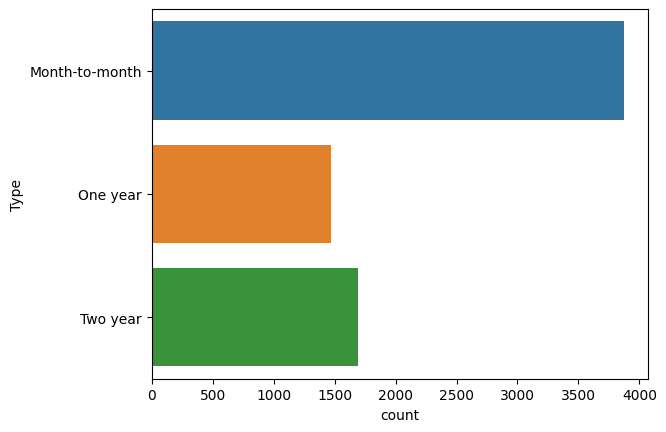

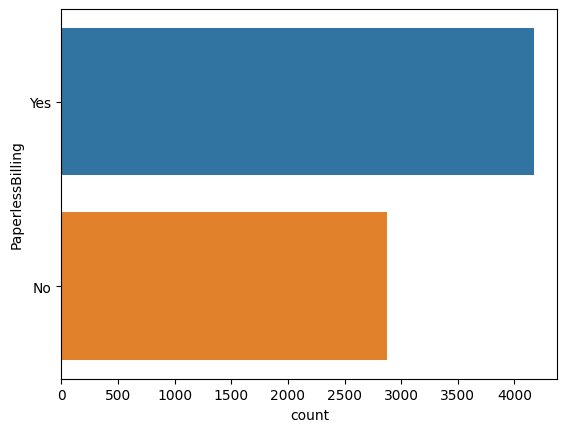

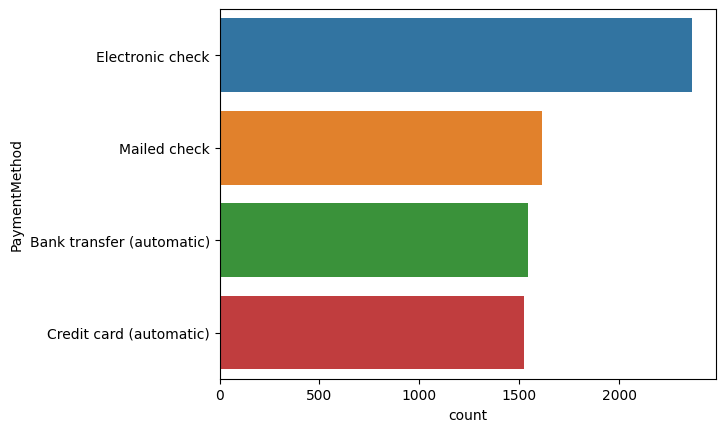

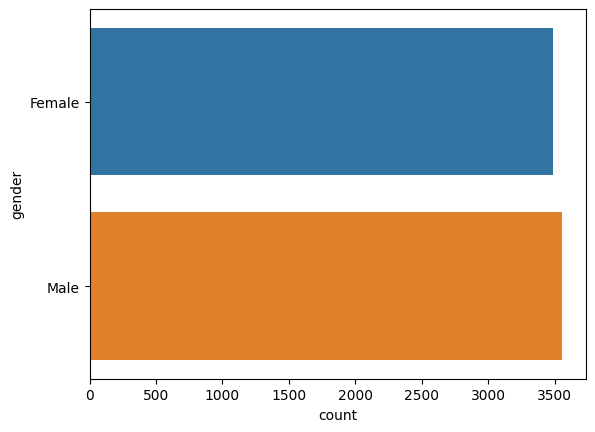

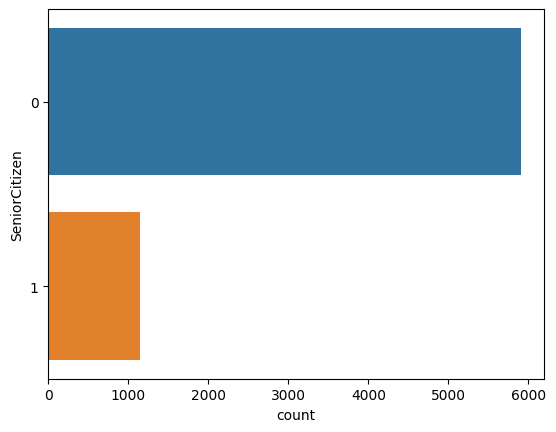

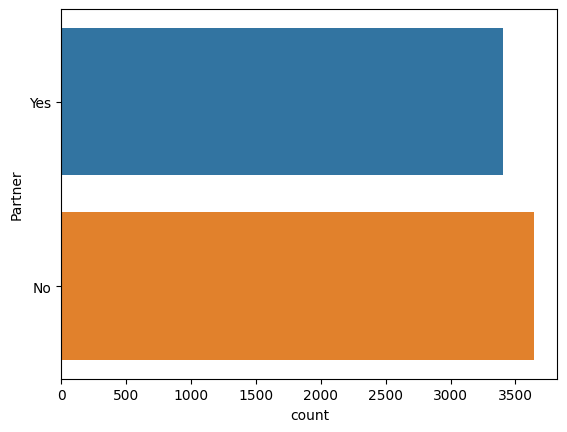

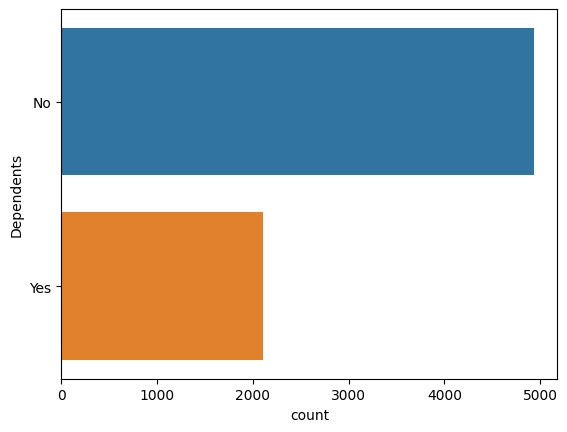

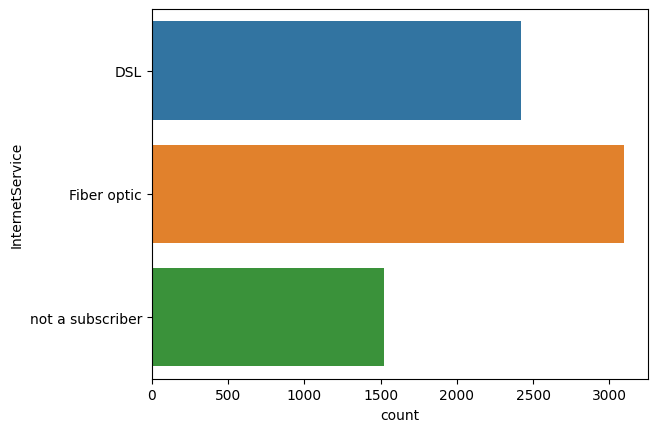

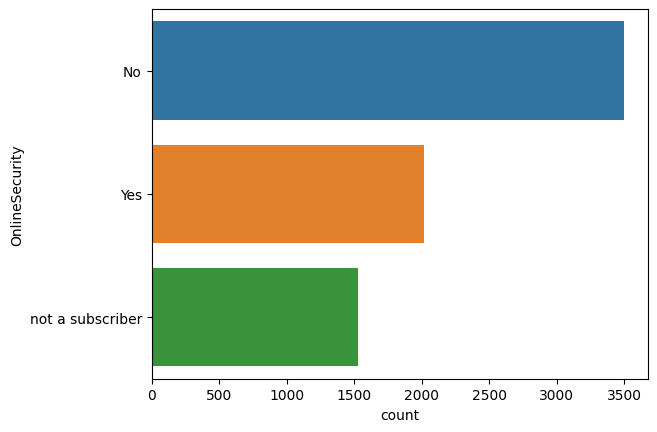

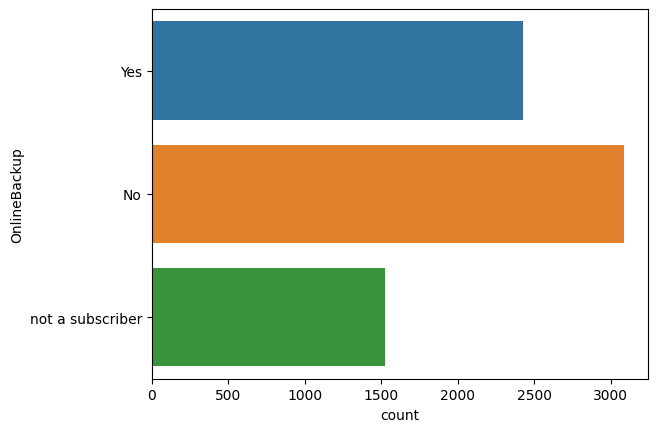

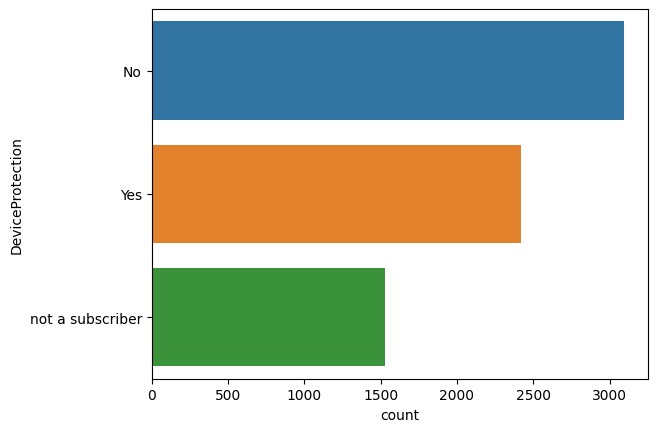

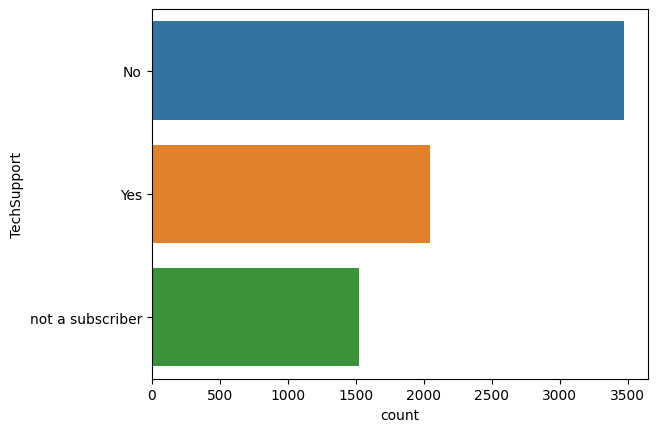

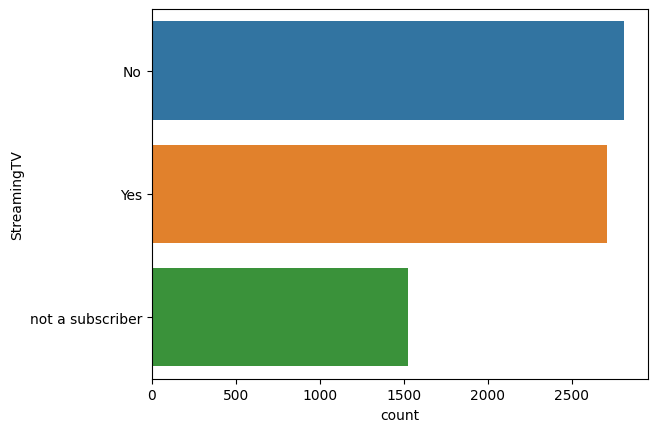

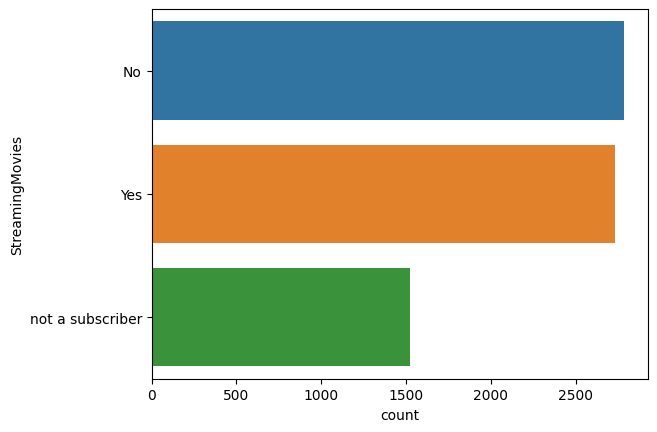

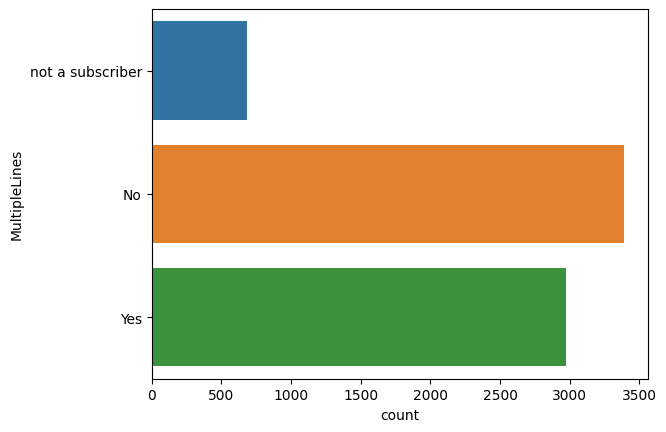

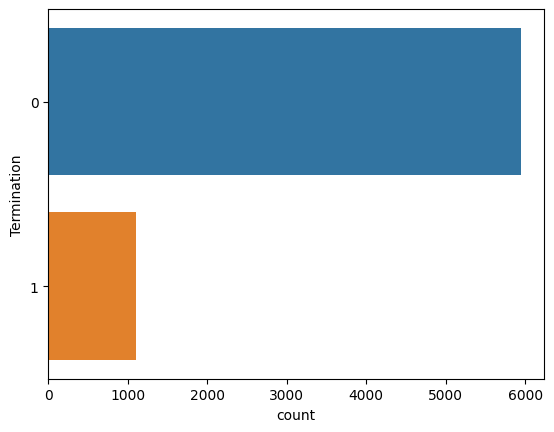

In [31]:
for col in cat_features:
    sns.countplot(data=data, y=data[col])
    plt.show()

Как распределяются значения в категориальных признаках:
<br>Большинство клиентов предпочитают ежемесячную оплату;
<br>В основном, клиенты получают счета электронно;
<br>Оплачивают электорнным чеком;
<br>В датасете практически поровну мужчин и женщин;
<br>Клиентов без партнера чуть больше, чем с ним;
<br>В два раза больше людей с иждивенцами, чем без них;
<br>Интернет чаще всего проводят по оптическому кабелю;
<br>Клиенты предпочитают не использовать дополнительные сервисы.
<br>ТВ и фильмы использую почти то же кол-во людей, что и отказались от этих услуг.
<br>Многоканальную телефонную линию в основном не используют.
<br>В датасете оставишихся клиентов больше, чем ушедших.
<br>Большинство клиентов не являются пенсионерами.

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


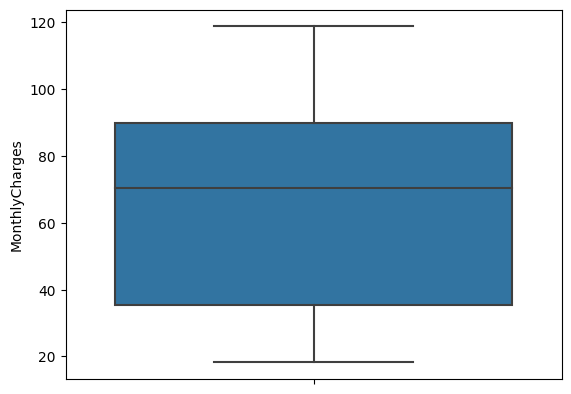

--------------------------------------------------------------
count    7043.000000
mean     2115.377573
std      2112.678861
min        19.050000
25%       436.750000
50%      1343.350000
75%      3236.690000
max      9221.380000
Name: TotalCharges, dtype: float64


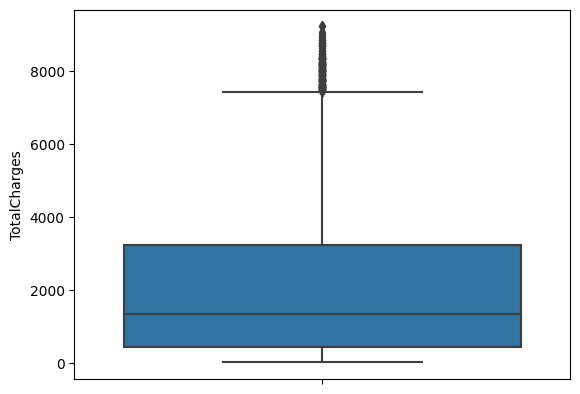

--------------------------------------------------------------
count    7043.000000
mean      898.555729
std       683.130510
min         0.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: ContractDuration, dtype: float64


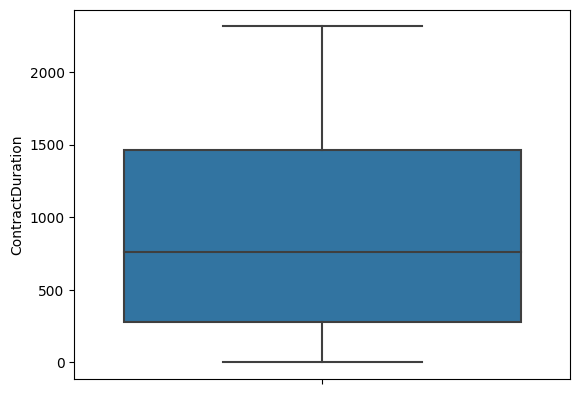

--------------------------------------------------------------


In [32]:
for col in interval_features:
    print(data[col].describe())
    sns.boxplot(data=data, y=data[col])
    plt.show()
    print('--------------------------------------------------------------')

Распредение в числовых признаках:
<br>Выбросы только в столбце итоговых выплат;
<br>В среднем за месяц клиенты тратят 64 доллара(?);
<br>В среднем итоговые выплаты составляют 2 тыс.;
<br>А продолжительность контракта в среднем составляет 898 дней (2,5 года).

Посмотрим на строки с выбросами в итоговых выплатах.

In [33]:
data[data['TotalCharges'] > 7000]

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Termination,ContractDuration
customerID,,,,,,,,,,,,,,,,,,,
9959-WOFKT,Two year,No,Bank transfer (automatic),106.70,8257.51,Male,0,No,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Yes,0,2163.0
5067-XJQFU,One year,Yes,Electronic check,108.45,7730.32,Male,1,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Yes,0,2010.0
5954-BDFSG,Two year,Yes,Credit card (automatic),107.50,7740.00,Female,0,No,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,0,2191.0
1891-QRQSA,Two year,Yes,Bank transfer (automatic),111.60,7142.40,Male,1,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes,0,1949.0
6728-DKUCO,One year,Yes,Electronic check,104.15,7498.80,Female,0,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Yes,0,2191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0218-QNVAS,One year,No,Bank transfer (automatic),100.55,7638.78,Male,0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Yes,0,2163.0
7203-OYKCT,One year,Yes,Electronic check,104.95,8085.35,Male,0,No,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,0,2191.0
1035-IPQPU,Month-to-month,Yes,Electronic check,103.50,7042.14,Female,1,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,0,1918.0


Это люди, которые используют практически все дополнительные услуги и достаточно давно являются клиентами провайдера.

### Исследование корреляции признаков

In [34]:
corr_matrix = data.phik_matrix(interval_cols=interval_features)

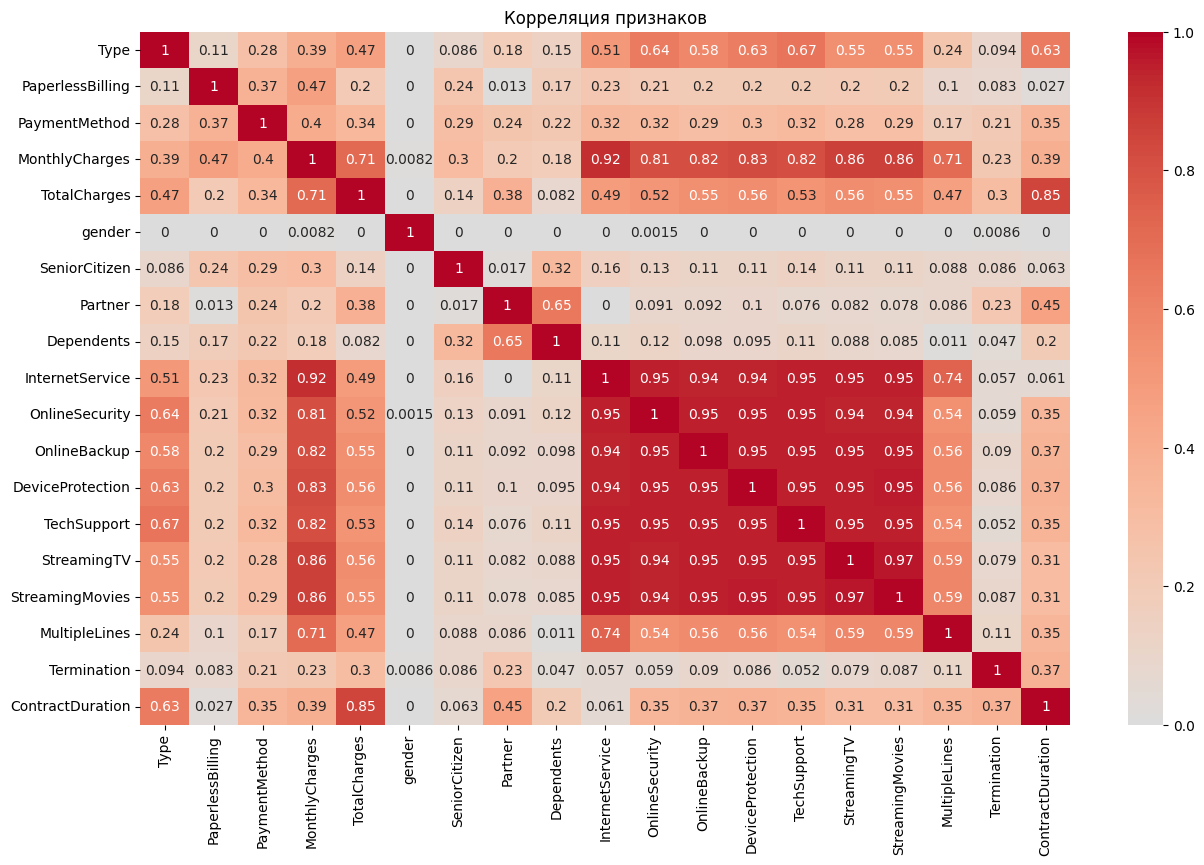

In [35]:
plt.figure(figsize=(15,9))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True).set_title('Корреляция признаков')
plt.show()

У признака gender нет корреляции с целевымм признком, в дальнейшем его можно убрать;

<br>Высокая корреляция между MonthlyCharges и TotalCharges, что логично, потому что чем больше плата в месяц, тем выше итоговые выплаты;
<br>Средняя корреляция между дополнительными услугами, месячными и итоговыми выплатми, что тоже логично: чем больше услуг, тем выше стоимость;
<br>Очень странно выглядит квадрат, который демонстрирует высокую корреляцию между дополнительными услугами. Возможно, клиенты подключают дополнительные услуги пакетами, и поэтому, если одна дополнительная услуга подключена, то и все остальные, с высокой долей выроятности, тоже;
<br>Высокая корреляция продолжительности договора с итоговыми выплатами;
<br>**Самая высокая корреляция у целевого признака с продолжительностью договора.**

In [36]:
data.drop('gender', axis=1, inplace=True)
cat_features.remove('gender')

### Устранение мультиколлинеарности

Избавимся от мультиколлинеарности. Уберем те признаки, у которых корреляция болье 0.7. Оставим только один признак из группы, который будет иметь самую высокую орреляция с целевым признаком.

<br> Начнем с MonthleCharges и TotalCharges. Корреляция между ними 0.71, а также корреляция между TotalCharges и ContractDuration составляет 0.85. Удалим оба этих признка
<br> Теперь признаки с дополнительными услугами, у них очень высокая корреляция между собой, выше 0.9. Оставим OnlineBackup - корреляция с целевым 0.09, самая высокая из группы.

In [37]:
data.drop(['MonthlyCharges', 'TotalCharges', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1, inplace=True)

Снова посмотрим на тепловую карту.

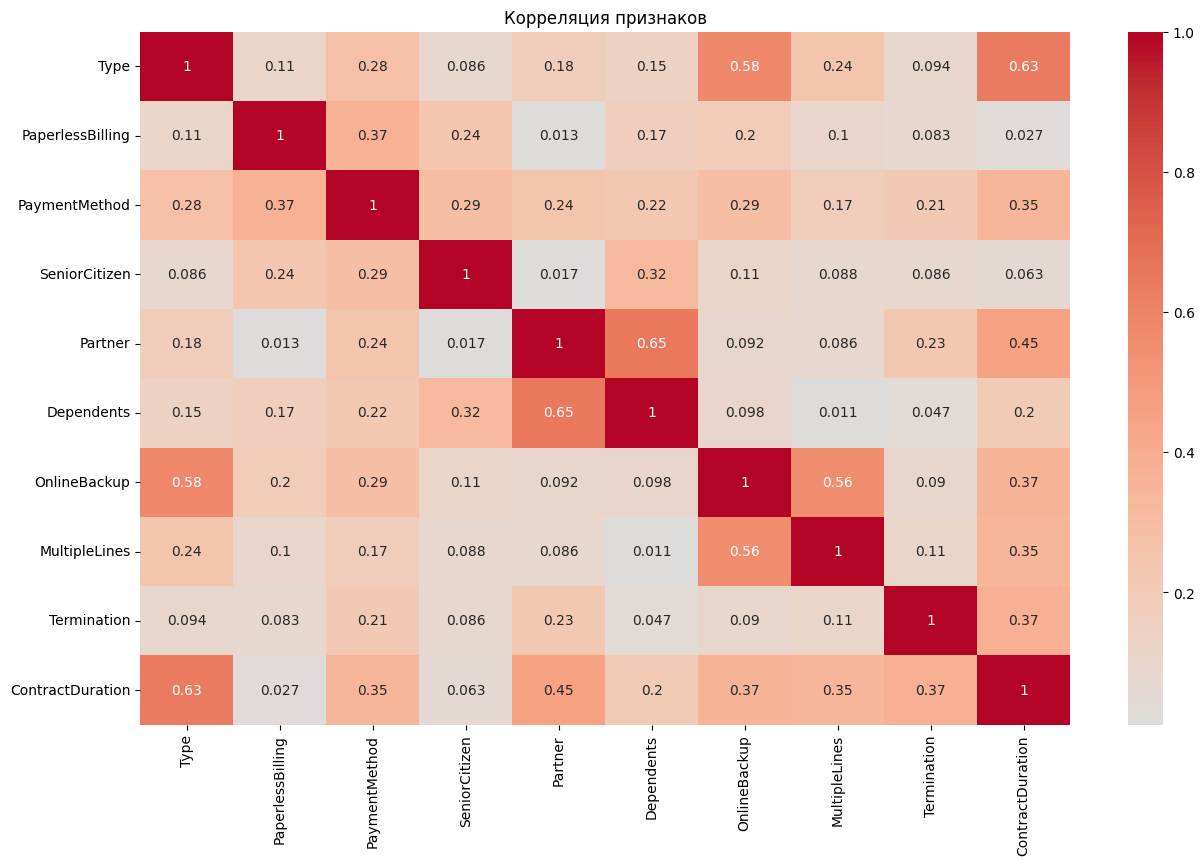

In [38]:
corr_matrix = data.phik_matrix(interval_cols=interval_features)
plt.figure(figsize=(15,9))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True).set_title('Корреляция признаков')
plt.show()

In [39]:
cat_features = []
interval_features = []

for col in data.columns:
    if is_string_dtype(data[col]) == False:
        interval_features.append(col)
    else:
        cat_features.append(col)

### Изучение дисбаланса классов

In [40]:
data[data['Termination'] == 0].shape[0] / data[data['Termination'] == 1].shape[0]

5.396911898274296

Одного класса больше другого в пять раз. Дисбаланс классов есть. Но мы будем использовать метрику для валидации AUC-ROC, она нечувствительна к дисбалансу. Чтобы метрика accuracy, которые мы будем использовать в отчете не показал совсем уже плохие результаты, при исследовании моделей будем использовать параметр class_weight='balanced'.

### Разделение данных на выборки и кодирование признаков

In [42]:
data.head()

,Type,PaperlessBilling,PaymentMethod,SeniorCitizen,Partner,Dependents,OnlineBackup,MultipleLines,Termination,ContractDuration
customerID,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,0,Yes,No,Yes,not a subscriber,0,31.0
5575-GNVDE,One year,No,Mailed check,0,No,No,No,No,0,1036.0
3668-QPYBK,Month-to-month,Yes,Mailed check,0,No,No,Yes,No,0,123.0
7795-CFOCW,One year,No,Bank transfer (automatic),0,No,No,No,not a subscriber,0,1371.0
9237-HQITU,Month-to-month,Yes,Electronic check,0,No,No,No,No,0,153.0


Разделим датасет на две выборки в соотношении 3:1.

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   OnlineBackup      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   Termination       7043 non-null   object 
 9   ContractDuration  7043 non-null   float64
dtypes: float64(1), object(9)
memory usage: 863.3+ KB


In [44]:
target = data['Termination']
features = data.drop('Termination', axis=1)

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=.25, random_state=RANDOM_STATE, stratify=target)

In [45]:
cat_features.remove('Termination')

In [46]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

In [47]:
cat_features

['Type',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'OnlineBackup',
 'MultipleLines']

In [48]:
tmp_1 = pd.DataFrame(ohe.fit_transform(features_train[cat_features]))
tmp_2 = pd.DataFrame(ohe.transform(features_test[cat_features]))

tmp_1.columns = ohe.get_feature_names_out()
tmp_2.columns = ohe.get_feature_names_out()
tmp_1.index = features_train.index
tmp_2.index = features_test.index

features_train_encoded = pd.concat([features_train[interval_features], tmp_1.astype('int64')], axis=1)
features_test_encoded = pd.concat([features_test[interval_features], tmp_2.astype('int64')], axis=1)

In [49]:
features_train_encoded.head()

,ContractDuration,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,Partner_Yes,Dependents_Yes,OnlineBackup_Yes,OnlineBackup_not a subscriber,MultipleLines_Yes,MultipleLines_not a subscriber
customerID,,,,,,,,,,,,,,
0618-XWMSS,273.0,0,0,1,0,0,0,0,0,1,0,0,0,0
8782-LKFPK,1340.0,0,0,1,0,0,1,0,0,0,0,0,1,0
2656-TABEH,215.0,0,0,1,0,1,0,0,1,0,1,0,1,0
3890-RTCMS,488.0,0,0,1,0,0,1,0,0,0,0,0,0,0
5546-BYZSM,1248.0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [50]:
features_test_encoded.head()

,ContractDuration,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,Partner_Yes,Dependents_Yes,OnlineBackup_Yes,OnlineBackup_not a subscriber,MultipleLines_Yes,MultipleLines_not a subscriber
customerID,,,,,,,,,,,,,,
2236-HILPA,1888.0,0,1,0,1,0,0,0,1,1,0,1,0,0
4018-KJYUY,671.0,0,0,0,1,0,0,0,0,1,0,1,0,0
0260-ZDLGK,396.0,0,0,1,0,0,1,0,0,1,0,0,0,0
8084-OIVBS,337.0,1,0,0,0,0,1,0,0,0,0,1,0,0
3014-WJKSM,883.0,0,0,1,1,0,0,0,1,0,0,0,0,0


In [ ]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

features_train_ordinal = features_train.copy()
features_test_ordinal = features_test.copy()

features_train_ordinal[cat_features] = oe.fit_transform(features_train_ordinal[cat_features])
features_test_ordinal[cat_features] = oe.transform(features_test_ordinal[cat_features])

In [ ]:
features_train_ordinal.head()

,Type,PaperlessBilling,PaymentMethod,SeniorCitizen,Partner,Dependents,OnlineBackup,MultipleLines,ContractDuration
customerID,,,,,,,,,
0618-XWMSS,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,273.0
8782-LKFPK,0.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1340.0
2656-TABEH,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,215.0
3890-RTCMS,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,488.0
5546-BYZSM,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1248.0


In [ ]:
features_test_ordinal.head()

,Type,PaperlessBilling,PaymentMethod,SeniorCitizen,Partner,Dependents,OnlineBackup,MultipleLines,ContractDuration
customerID,,,,,,,,,
2236-HILPA,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1888.0
4018-KJYUY,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,671.0
0260-ZDLGK,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,396.0
8084-OIVBS,1.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,337.0
3014-WJKSM,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,883.0


In [ ]:
sc = StandardScaler()

features_train_scaled = features_train_encoded.copy()
features_test_scaled = features_test_encoded.copy()

features_train_scaled[interval_features] = sc.fit_transform(features_train_scaled[interval_features])
features_test_scaled[interval_features] = sc.transform(features_test_scaled[interval_features])

In [ ]:
features_train_scaled.head()

,ContractDuration,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,Partner_Yes,Dependents_Yes,OnlineBackup_Yes,OnlineBackup_not a subscriber,MultipleLines_Yes,MultipleLines_not a subscriber
customerID,,,,,,,,,,,,,,
0618-XWMSS,-0.913754,0,0,1,0,0,0,0,0,1,0,0,0,0
8782-LKFPK,0.651326,0,0,1,0,0,1,0,0,0,0,0,1,0
2656-TABEH,-0.998829,0,0,1,0,1,0,0,1,0,1,0,1,0
3890-RTCMS,-0.598391,0,0,1,0,0,1,0,0,0,0,0,0,0
5546-BYZSM,0.516380,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
features_test_scaled.head()

,ContractDuration,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,Partner_Yes,Dependents_Yes,OnlineBackup_Yes,OnlineBackup_not a subscriber,MultipleLines_Yes,MultipleLines_not a subscriber
customerID,,,,,,,,,,,,,,
2236-HILPA,1.455135,0,1,0,1,0,0,0,1,1,0,1,0,0
4018-KJYUY,-0.329966,0,0,0,1,0,0,0,0,1,0,1,0,0
0260-ZDLGK,-0.733337,0,0,1,0,0,1,0,0,1,0,0,0,0
8084-OIVBS,-0.819878,1,0,0,0,0,1,0,0,0,0,1,0,0
3014-WJKSM,-0.019003,0,0,1,1,0,0,0,1,0,0,0,0,0


### Исследование моделей

**Рассмотрим три модели:**
<br>- Логистическую регрессию;
<br>- Случайный лес;
<br>- CatBoost.

<br>Подбирать гиперпараметры будем с помощью RandomSearch, а метрикой будет AUC-ROC.

In [ ]:
target_train = target_train.astype('int64')
target_test = target_test.astype('int64')

#### Логистическая регрессия

In [ ]:
lg = LogisticRegression(random_state=RANDOM_STATE)

params_lg = { 'solver': ['liblinear'],
             'max_iter': (100, 1000, 10),
             'class_weight': ['balanced']
}

lg_random = RandomizedSearchCV(lg, params_lg, n_iter=3, scoring='roc_auc', n_jobs=-1, cv=5)
search_lg = lg_random.fit(features_train_scaled, target_train)

In [ ]:
f'Лучшие параметры для LogisticRegression: {search_lg.best_params_}, лучший показатель AUC-ROC: {search_lg.best_score_}'

"Лучшие параметры для LogisticRegression: {'solver': 'liblinear', 'max_iter': 100, 'class_weight': 'balanced'}, лучший показатель AUC-ROC: 0.7618378145264737"

Случайный лес.

In [ ]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)

params_rf = {'n_estimators': range(100, 1001, 100),
             'max_depth': range(2, 7),
             'class_weight': ['balanced']
}

rf_random = RandomizedSearchCV(rf, params_rf, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5)
search_rf = rf_random.fit(features_train_ordinal, target_train)

In [ ]:
f'Лучшие параметры для RandomForestClassifier: {search_rf.best_params_}, лучший показатель AUC-ROC: {search_rf.best_score_}'

"Лучшие параметры для RandomForestClassifier: {'n_estimators': 200, 'max_depth': 6, 'class_weight': 'balanced'}, лучший показатель AUC-ROC: 0.8319664593551499"

CatBoost.

In [ ]:
cb = CatBoostClassifier(random_state=RANDOM_STATE)

params_cb = {'iterations': range(100, 1001, 100),
             'loss_function': ['Logloss']
             }

cb_random = RandomizedSearchCV(cb, params_cb, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5)
search_cb = cb_random.fit(features_train, target_train, cat_features=cat_features, verbose=False)

In [ ]:
f'Лучшие параметры для search_cb: {search_cb.best_params_}, лучший показатель AUC-ROC: {search_cb.best_score_}'

"Лучшие параметры для search_cb: {'loss_function': 'Logloss', 'iterations': 1000}, лучший показатель AUC-ROC: 0.8871183222979184"

#### Проверка лучше модели на тестовой выборке

In [ ]:
cb = CatBoostClassifier(iterations=1000, loss_function='Logloss', random_state=RANDOM_STATE)

cb.fit(features_train, target_train, cat_features=cat_features, verbose=False)

probabilities_valid = cb.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
f'Значение AUC-ROC на тестовой выборке {roc_auc_score(target_test, probabilities_one_valid)}, модель предсказывает правильно в {round((accuracy_score(cb.predict(features_test), target_test)) * 100)}% случаев'

'Значение AUC-ROC на тестовой выборке 0.8841857335127861, модель предсказывает правильно в 89% случаев'

### Анализ матрицы ошибок

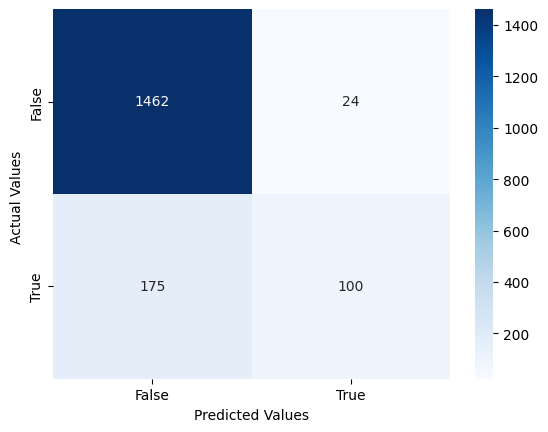

In [ ]:
cf_matrix = confusion_matrix(target_test, cb.predict(features_test))

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt="d")

ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()


True Negative - 1462, модель хорошо предсказывает клиентов, которые не расторгнут контракт;
<br>False Negative - модель 175 неправильно предсказала, что клиент не расторгнет контракт;
<br>True Positive - модель 100 из 124 раза правильно прдесказала рсторжение контракта;
<br> False Positive - 24 неправильных предсказаний расторжения контракта.

### Анализ важности признаков

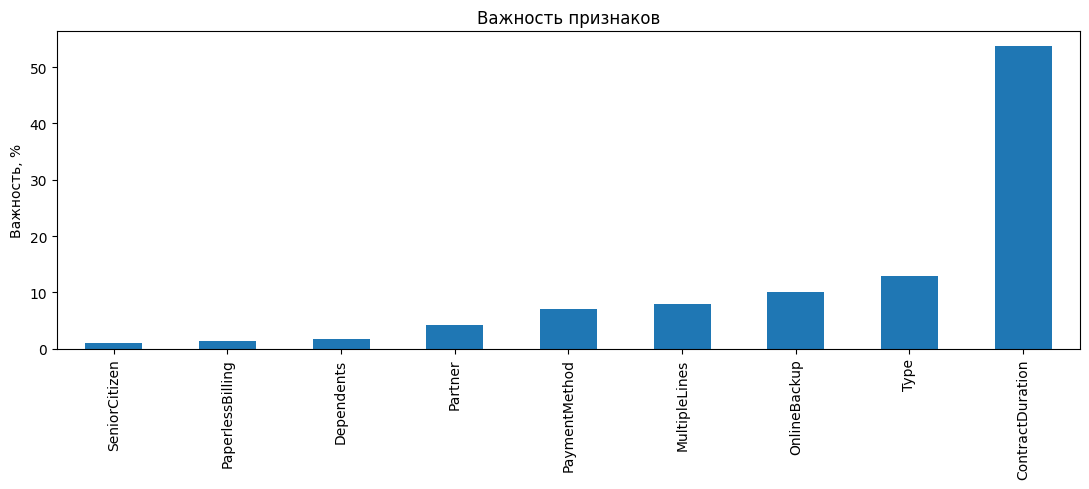

In [ ]:
features_importance = pd.Series(cb.get_feature_importance(),
                         features_test.columns).sort_values()
fig, ax = plt.subplots(figsize=(11,5))
features_importance.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

Самые важные признаки это: ContractDuration, Type и OnlineBackup.

### Итоги

Лучшей моделью оказался CatBoost с такими параметрами: loss_function= 'Logloss', iterations=1000. Метрика AUC-ROC на тестовой выборке 0.88, что выше порогового значения. А точность составила 88%.

## Отчет

### Ключевые шаги работы над проектом

1. Преподготовка данных:
    1. Соединение датасетов
    2. Удаление дубликатов
    3. Заполнение пропусков
    4. Создание целевого признака на основе столбца EndDate
    5. Исследование корреляции признаков
    6. Изучение дисбаланса классов и методы его устранения
    7. Разделение датасета на выборки
2. Исследование моделей (не менее двух разных):
    1. Подбор гиперпараметров, оценивание модели на кросс-вадиации
    2. Анализ матрицы ошибок
    3. Контроль утечки целевого признака

Все шаги были успешно выполнены. Дополнительно были выполнены: кодирование признаков и отбор признаков для устранения мультиколлинеарности.

### Анализ сложностей и пути их решения

В столбце TotalCharges в значении был пробел вместо Nan, этот пробел превращал этот признак в категориальный. Это случилось потому что клиенты с таким значением заключили договор с провайдером в день выгрузки датасета. Пробел заменили на значение из столбца MonthlyCharges.

<br> Так же, при соединении всех датасетов образовались пропуски в столбцах с допольнительными услугами. Некоторые клиенты вообще не использовали интернет или телефонию, значит не использовали допольнительные услуги для них. 'No' было бы неправильно ставить, потому что это бы значило, что они используют, к примеру, интернет, но не используют доп услугу для них, поэтому была поставлена заглушка 'not a subscriber' - не абонент.

<br>В данных присутвовала мультиколлинеарность. Столбцы с дополнительными услугами имели высокую корреляцию между собой. Был выбран признак с самой высокой корреляцией с целевым, остальные из этой группы были удалены. То же самое было и со столбцами MonthlyCharges и TotalCherges, были удалены оба, т.к. коррелировали с признаком ContractDuration

<br>Присутвует дисбаланс классов. Решение: использовать при обучении моделей гиперпараметр class_weght = 'balanced'.

### Итоговый список признаков для обучения и их кодирование

- **Type** - тип оплаты: ежемесячный, годовой, двухгодичный;
- **PaperlessBilling** - электронный счет;
- **PaymentMethod** - способ оплаты;
- **SeniorCitizen** - пенсионный статус;
- **Partner** - наличие партнера;
- **Dependents** - наличие иждивенцев;
- **OnlineBackup** - наличие резервного копирования;
- **MultipleLines** - наличие параллельных  телефонных линий;
- **Termination** - расторжение контракта (целевой признак);
- **ContractDuration** - продолжительность контракта.

Кодирование производилось OneHotEncoder для логистической регрессии, а OrdinalEncoder для случайного леса, т.к. OneHotEncoder увеличивает количество признаков, в результате чего модели сложнее создавать разделяющие правила, поэтому время работы и расчётные характеристики моделей сильно страдают на больших наборах данных.

### Краткое описание предобработки данных

- Датасеты были соединены в один общий, в результате чего образовались пропуски. Пропуски заполняли заглушкой 'not a subscriber'.
- Дубликаты и аномаальные значения не были обнаружены.
- Для устранения мультиколлинеарности были отобраны признаки: Type, PaperlessBilling, SeniorCitizen, Partner, Dependents, OnlineBackup, MultipleLines, Termination, ContractDuration.
- Для линейной модели признаки были закодированы с помощью метода OneHotEncoder, для случайного леса OrdinalEncoder.
- Датасет был разделен на тренировочную и тестовую выборки в соотношении 3:1.

### Сводная таблица исследованных моделей и их метрика на кросс-валидации

In [ ]:
results =[[search_lg.best_score_],
            [search_rf.best_score_],
            [search_cb.best_score_]]
models = ['Логистическая регрессия', 'Случайный лес', 'CatBoost']

pd.DataFrame(data=results, index=models, columns=['AUC-ROC'])

,AUC-ROC
Логистическая регрессия,0.761838
Случайный лес,0.831966
CatBoost,0.887118


### Лучшая модель - название, гиперпраметры, метрика на кросс-валидации

Лучшая модель - CatBoost.

In [ ]:
f'Лучшие параметры для модели CatBoost: {search_cb.best_params_}, лучший показатель AUC-ROC на кросс-валидации: {search_cb.best_score_}'

"Лучшие параметры для модели CatBoost: {'loss_function': 'Logloss', 'iterations': 1000}, лучший показатель AUC-ROC на кросс-валидации: 0.8871183222979184"

### Итоговая метрика на test

In [ ]:
f'Значение AUC-ROC на тестовой выборке {roc_auc_score(target_test, probabilities_one_valid)}, модель предсказывает правильно в {round((accuracy_score(cb.predict(features_test), target_test)) * 100)}% случаев'

'Значение AUC-ROC на тестовой выборке 0.8841857335127861, модель предсказывает правильно в 89% случаев'

### Матрица ошибок

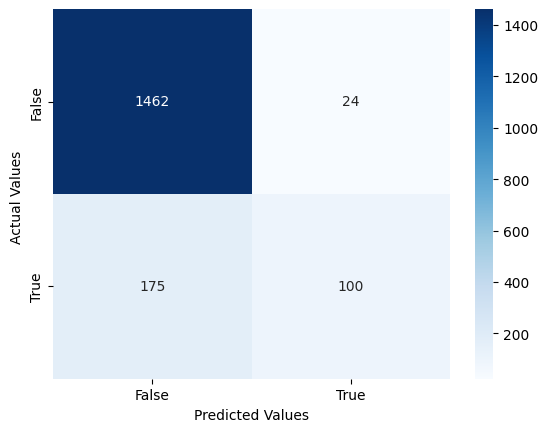

True Negative - 1462, модель хорошо предсказывает клиентов, которые не расторгнут контракт;
<br>False Negative - модель 175 неправильно предсказала, что клиент не расторгнет контракт;
<br>True Positive - модель 100 из 124 раза правильно прдесказала рсторжение контракта;
<br> False Positive - 24 неправильных предсказаний расторжения контракта.

### Важность признаков

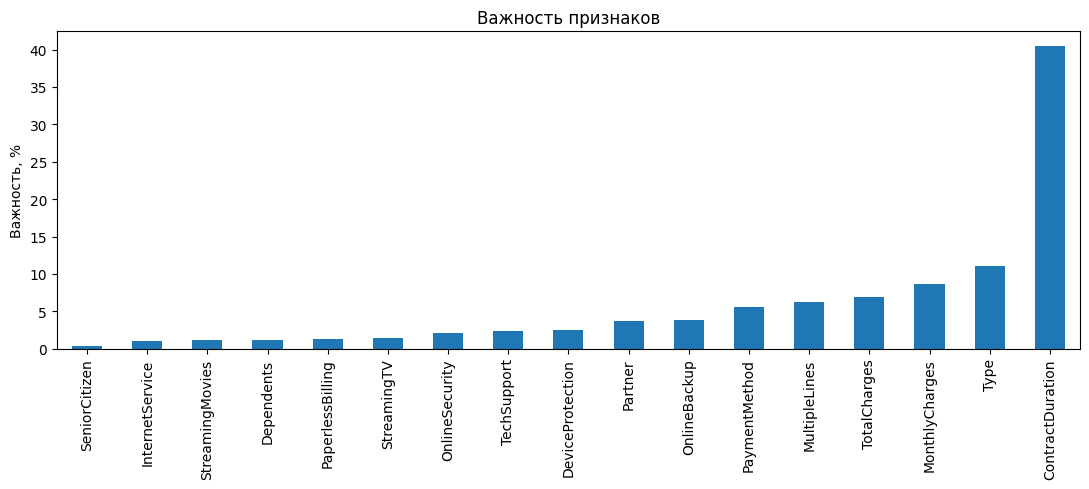

Самые важные признаки в обучении CatBoost это: ContractDuration, Type и MonthlyCharges.